# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Nurdiansyah Krisna Putra]
- **Email:** [nurdiansyahkrisnaputra@students.amikom.ac.id]
- **ID Dicoding:** [nurdiansyah_krisna_putra_qgms]

## Menentukan Pertanyaan Bisnis

- Bagaimana performa perentalan sepeda dalam satu tahun terakhir baik untuk pelanggan Casual, Registered, atau keduanya ( Total )
- Bagaimana pengaruh cuaca, temperatur, windspeed, dan kelembapan mempengaruhi intensitas perentalan
- Apakah sepeda banyak disewa di hari libur atau hari kerja ?
- Apakah ada temuan pola atau pattern baru yang tidak terpikirkan sebelumnya ?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [ ]:
#membaca dataset day.csv dan tampilkan
day_df = pd.read_csv("/content/drive/My Drive/Bangkit/Project/Data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
day_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [ ]:
#membaca dataset hour.csv dan tampilkan
hour_df = pd.read_csv("/content/drive/My Drive/Bangkit/Project/Data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
hour_df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


**Insight:**

Dataset day.csv

- Dataset dimulai pada 1 Januari 2011 sampai dengan 31 desember 2012.
- Kolom yr menandai tahun, dengan kode 0 untuk 2011 dan 1 untuk 2012.
- Kolom weathersit menggunakan angka untuk menunjukkan jenis cuaca.
- Terdapat dua jenis pengguna, casual (pengguna santai) dan registered (pengguna terdaftar). Total pengguna sepeda tercatat di kolom cnt.
- DAta temp, atemp, hum dan windspeed tampaknya sudah dinormalisasi.

Dataset hour.csv

- Dataset ini berisi data per jam, ditunjukkan oleh kolom hr (0-23). Data pertama dimulai pada pukul 00:00
- lainnya sama dengan data day.csv

### Assessing Data

In [ ]:
# Menampilkan ringkasan informasi struktur dataset harian (day.csv)
day_df.info()

# Menampilkan ringkasan informasi struktur dataset per jam (hour.csv)
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [ ]:
# Memberikan statistik deskriptif untuk setiap kolom numerik di dataset harian
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
# Memberikan statistik deskriptif untuk setiap kolom numerik di dataset per jam
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
# Mengecek jumlah nilai yang hilang (NaN) di setiap kolom dataset harian
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
# Mengecek jumlah nilai yang hilang (NaN) di setiap kolom dataset per jam
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
# Menghitung dan mencetak jumlah baris duplikat di dataset harian
print("Jumlah duplikasi: ", day_df.duplicated().sum())

# Menghitung dan mencetak jumlah baris duplikat di dataset per jam
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


**Insight:**
- Tidak ada nilai yang hilang (NaN) di kedua dataset.
- Tidak ditemukan data duplikat dalam kedua dataset.
- Dataset day.csv memiliki 731 entri.
- Dataset hour.csv memiliki 17.379 entri.
- Tipe data didominasi oleh int64 dan float64, dengan hanya satu kolom dteday bertipe object (tanggal).
- Pengguna sepeda harian (cnt) berkisar dari 22 hingga 8.714 pengguna, dengan rata-rata sekitar 4.504 pengguna per hari.
- Pengguna sepeda per jam berkisar dari 1 hingga 977 pengguna, dengan rata-rata sekitar 189 pengguna.
- Jumlah pengguna terdaftar (registered) secara signifikan lebih tinggi daripada pengguna santai (casual), baik dalam data harian maupun per jam.
- Maksimum pengguna terdaftar mencapai 6.946 dalam satu hari, sementara pengguna santai maksimal 3.410.

### Cleaning Data

In [ ]:
# Mengubah kolom dteday menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [ ]:
# Mengganti nama kolom agar lebih mudah dibaca
day_df.rename(columns={'dteday':'date','yr':'year','mnth':'month', 'weathersit':'weather','cnt':'count','hum':'humidity'},inplace=True)

In [ ]:
# Mengganti nama kolom agar lebih mudah dibaca
hour_df.rename(columns={'dteday':'date','yr':'year','hr':'hours','mnth':'month', 'weathersit':'weather','cnt':'count','hum':'humidity'},inplace=True)

In [ ]:
# Konversi year menjadi 2011 dan 2012
day_df['year'] = day_df['year'].replace({0: '2011', 1: '2012'})
hour_df['year'] = hour_df['year'].replace({0: '2011', 1: '2012'})

**Insight:**
- Mengubah tipe data kolom dteday
- mengubah beberapa nama kolom karena tidak konsisten dan sulit dibaca
- mengganti data tahun agar lebih mudah dipahami
- data tidak ada yang kosong ataupun terduplikasi

## Exploratory Data Analysis (EDA)

### Explore ...

Explore day_df

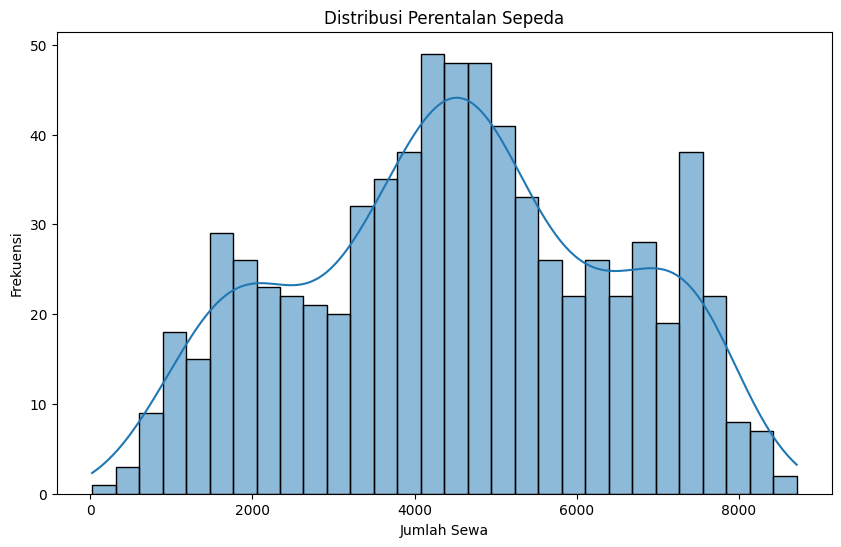

In [39]:
# grafik distribusi
plt.figure(figsize=(10, 6))
sns.histplot(day_df['count'], bins=30, kde=True)
plt.title('Distribusi Perentalan Sepeda')
plt.xlabel('Jumlah Sewa')
plt.ylabel('Frekuensi')
plt.show()

In [40]:
# menambah kolom selisih
selisih = abs(day_df["registered"] - day_df["casual"])
day_df["selisih_d"] = selisih

<Axes: >

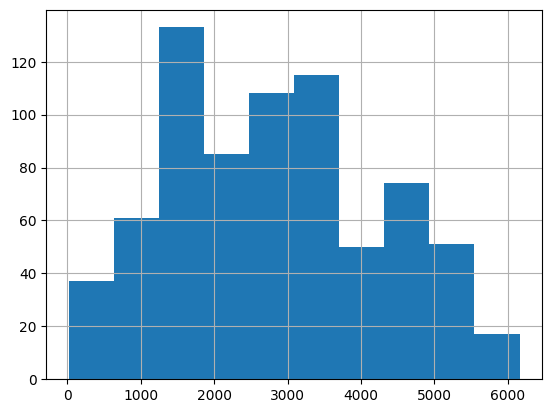

In [41]:
# histogram selisih
day_df.selisih.hist()

Explore hour_df

In [42]:
# menambah kolom selisih
selisih = abs(hour_df["registered"] - hour_df["casual"])
hour_df["selisih_h"] = selisih

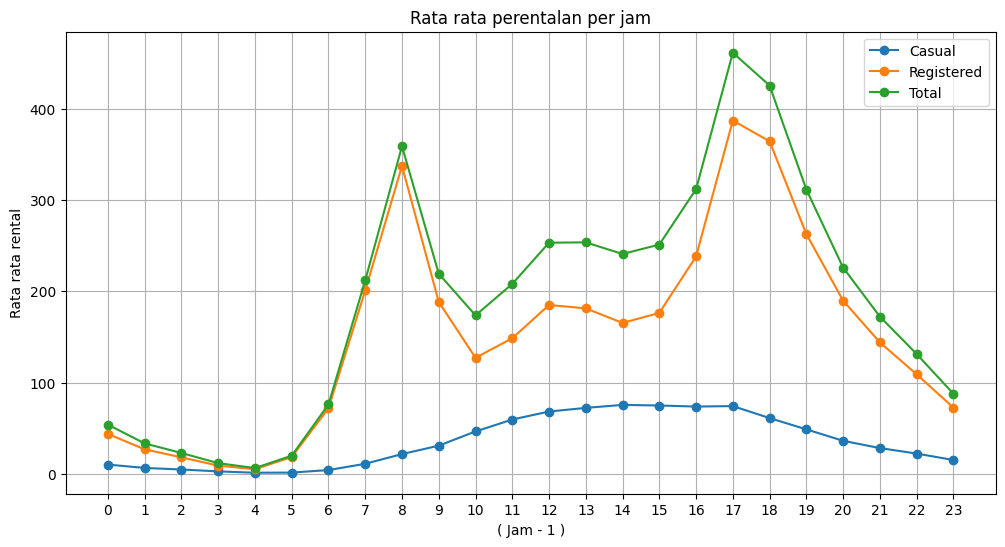

In [43]:
df = pd.DataFrame(hour_df)

# Merata rata jumlah rental per jam
average_rentals = df.groupby('hours')[['casual', 'registered', 'count']].mean()

# grafik
plt.figure(figsize=(12, 6))
plt.plot(average_rentals.index, average_rentals['casual'], marker='o', label='Casual')
plt.plot(average_rentals.index, average_rentals['registered'], marker='o', label='Registered')
plt.plot(average_rentals.index, average_rentals['count'], marker='o', label='Total')

plt.title('Rata rata perentalan per jam')
plt.xlabel('( Jam - 1 )')
plt.ylabel('Rata rata rental')
plt.xticks(range(24))
plt.grid(True)
plt.legend()

plt.show()

Explore hour_df & day_df

In [48]:
# menjumlahkan semua selisih pada hour_df dam membuat baris baru berdasar tanggal
selisih_hour_sum = hour_df.groupby("date")["selisih_h"].sum().reset_index()

In [49]:
# menggabungkan 2 data set
all_df = day_df.copy()
all_df = pd.merge(all_df, selisih_hour_sum, how="left", on="date")
all_df["selisih_check"] = all_df["selisih_d"] == all_df["selisih_h"]

In [50]:
# Melihat apakah semua selisihnya sama, antara dataset 1 dan 2
all_df["selisih_check"].value_counts()

,count
selisih_check,
True,582
False,149


**Insight:**
- Jumlah sewa dengan frekuensi tertinggi adalah 4000 sampai 5000
- Selisih perentalan sepeda antara pengguna causl dan terdaftar biasanya berjumlah 1500 - 3500 ( data dengan frekuensi tertinggi )
- Jam yang paling banyak terjadi perentalan sepeda adalah pukul 9 pagi dan 6 sore
- ternyata ada beberapa data yang tidak sesuai antara hour_df dan day_df

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa perentalan sepeda dalam satu tahun terakhir baik untuk pelanggan Casual, Registered, atau keduanya ( Total )

In [51]:
df_total = all_df

In [55]:
df_last_year = df_total[df_total['year'] == '2012']

In [56]:
monthly_data = df_last_year.groupby('month').agg(
    total_rentals=('count', 'sum'),
    casual_rentals=('casual', 'sum'),
    registered_rentals=('registered', 'sum')
).reset_index()

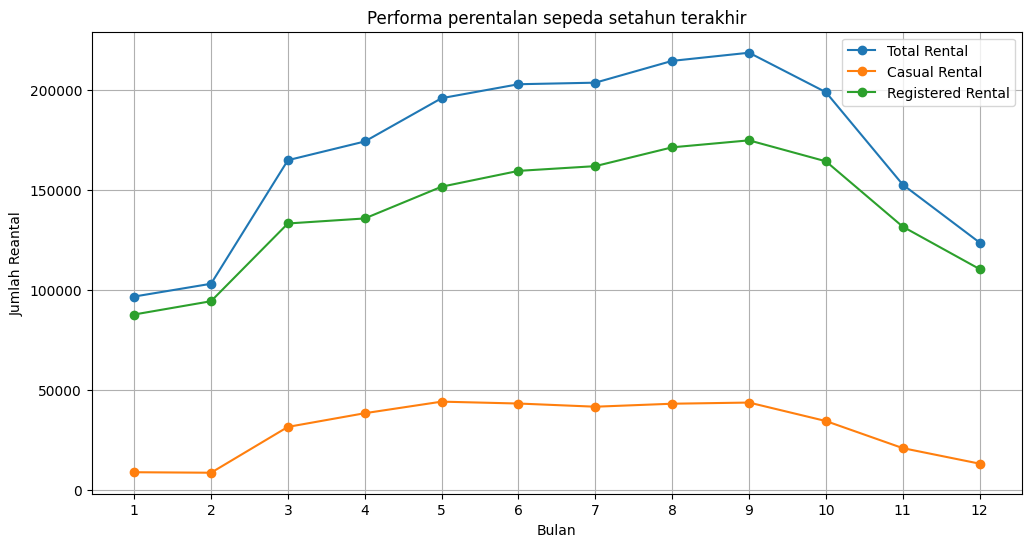

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['month'], monthly_data['total_rentals'], label='Total Rental', marker='o')
plt.plot(monthly_data['month'], monthly_data['casual_rentals'], label='Casual Rental', marker='o')
plt.plot(monthly_data['month'], monthly_data['registered_rentals'], label='Registered Rental', marker='o')
plt.xticks(range(1, 13))
plt.xlabel('Bulan')
plt.ylabel('Jumlah Reantal')
plt.title('Performa perentalan sepeda setahun terakhir')
plt.legend()
plt.grid()
plt.show()

### Pertanyaan 2:Bagaimana pengaruh cuaca, temperatur, windspeed, dan kelembapan mempengaruhi intensitas perentalan
- Apakah sepeda banyak disewa di hari libur atau hari kerja ?
- Apakah ada temuan pola atau pattern baru yang tidak terpikirkan sebelumnya ?

In [58]:
df_weather = all_df
df_last_year = df_weather[df_weather['year'] == '2012']

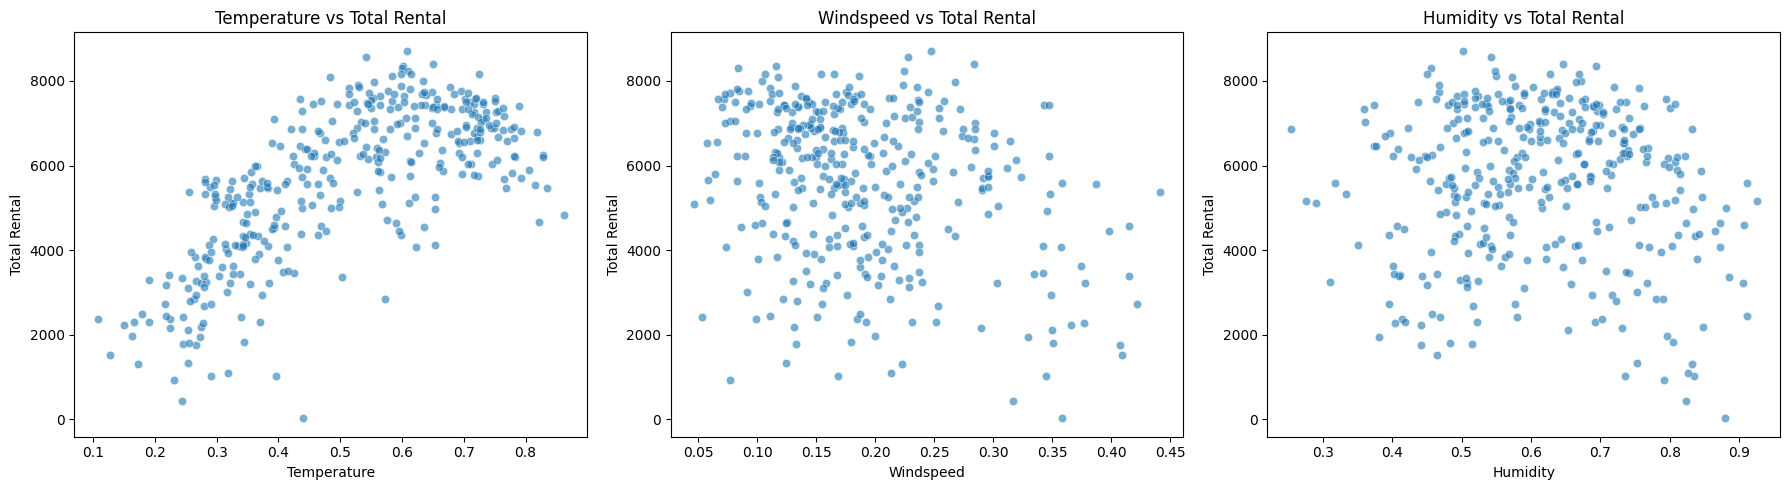

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(x='temp', y='count', data=df_last_year, alpha=0.6, ax=axes[0])
axes[0].set_title('Temperature vs Total Rental')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Total Rental')

sns.scatterplot(x='windspeed', y='count', data=df_last_year, alpha=0.6, ax=axes[1])
axes[1].set_title('Windspeed vs Total Rental')
axes[1].set_xlabel('Windspeed')
axes[1].set_ylabel('Total Rental')

sns.scatterplot(x='humidity', y='count', data=df_last_year, alpha=0.6, ax=axes[2])
axes[2].set_title('Humidity vs Total Rental')
axes[2].set_xlabel('Humidity')
axes[2].set_ylabel('Total Rental')

plt.tight_layout()
plt.show()

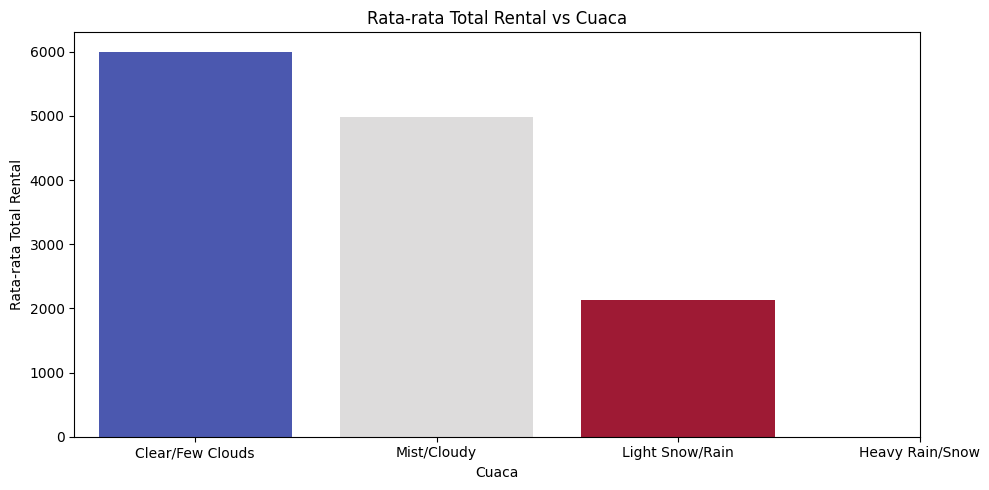

In [67]:
plt.figure(figsize=(10, 5))

sns.barplot(x='weather', y='count', data=df_last_year, errorbar=None, hue='weather', legend=False, palette='coolwarm')
plt.title('Rata-rata Total Rental vs Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Rata-rata Total Rental')
plt.xticks(ticks=[0, 1, 2, 3], labels=[
    'Clear/Few Clouds',
    'Mist/Cloudy',
    'Light Snow/Rain',
    'Heavy Rain/Snow'
])

plt.tight_layout()
plt.show()

### Pertanyaan 3:Apakah sepeda banyak disewa di hari libur atau hari kerja ?

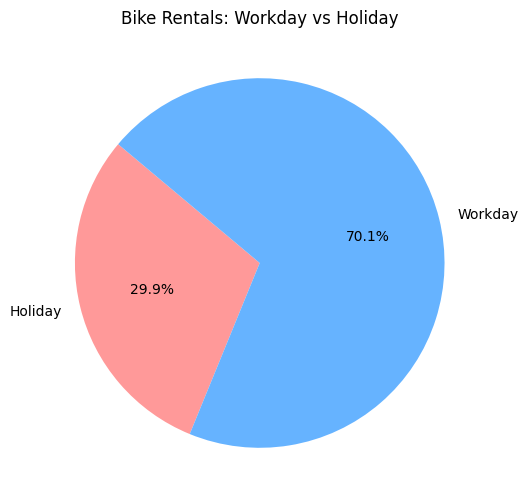

In [69]:
workday_counts = df_last_year.groupby('workingday')['count'].sum()
labels = ['Holiday', 'Workday']
colors = ['#ff9999', '#66b3ff']

plt.figure(figsize=(8, 6))
plt.pie(workday_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Bike Rentals: Workday vs Holiday')
plt.show()

### Pertanyaan 4: Apakah ada temuan pola atau pattern baru yang tidak terpikirkan sebelumnya ?

In [72]:
data_mismatch = all_df[all_df['selisih_check'] == False].copy()

In [74]:
data_mismatch['weekday'] = pd.to_datetime(data_mismatch['date']).dt.weekday + 1

In [75]:
error_by_day = data_mismatch['weekday'].value_counts().sort_index()

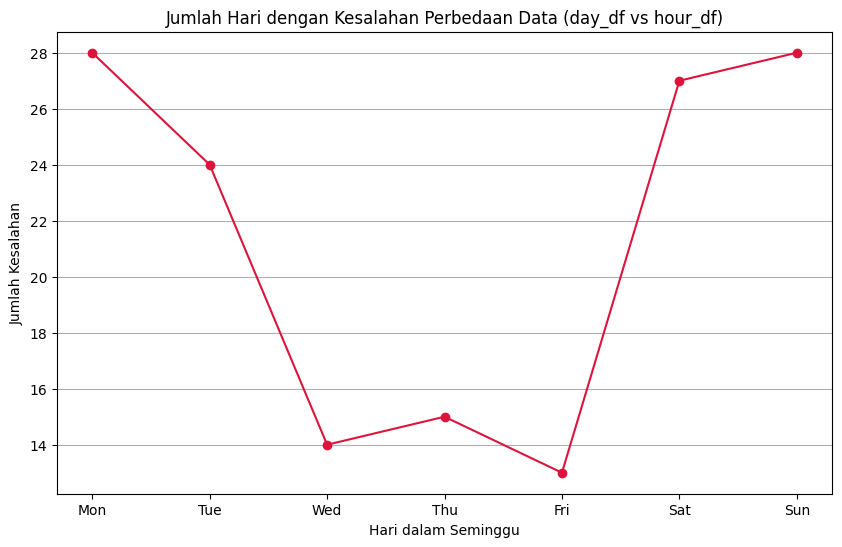

In [76]:
plt.figure(figsize=(10, 6))
plt.plot(error_by_day.index, error_by_day.values, marker='o', linestyle='-', color='crimson')
plt.xticks(ticks=range(1, 8), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Jumlah Hari dengan Kesalahan Perbedaan Data (day_df vs hour_df)')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Kesalahan')
plt.grid(axis='y')
plt.show()

**Insight:**
- Perentalan mencapai angka 200.000 pada bulan ke 6 sampai 10 ( sebaiknya tambah karyawan sementara )
- Perentalan dibawah angka 150.000 pada bulan 1, 2 , 11, dan 12
- jumlah perental meningkat seiring meningkatnya temperatur
- perental lebih banyak saat kecepatan angin cukup rendah
- perental lebih banyak saat kelembapan tidak tinggi dan tidak rendah
- semakin cerah cuacanya semakin banyak yang rental
- 70% sepeda yand dirental itu terjadi pada waktu weekday
- ada banyak kesalahan input data ( perbedaan di day_df dan hour_df ) pada hari senin,selasa,sabtu,dan minggu ( Coba periksan karyawan yang bekerja hari itu )